# Tasks

## Task 6.1: Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.
## NOTE: If the running time is too long, you can reduce the number of samples.
## NOTE: You should comment on your code and explain what each part is doing

In [14]:
############# WRITE THE CODE IN THIS CELL ####################
#import the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px



In [15]:
#Import the dataset

df = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/Tweets.csv')



## Visualise the dataset

In [16]:

df.head(5)


,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [17]:
df.shape

(40000, 2)

## Drop the null values


In [18]:

df.dropna(inplace = True)

## Extracting the sample we want to use

In [19]:
df = df.sample(n=10000, random_state = 48)
df.reset_index(drop=True, inplace=True)

## Word Cloud


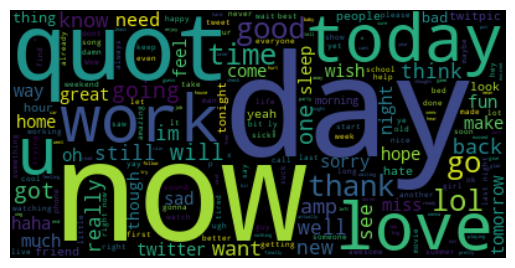

In [20]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

## Assigning reviews 
### Tweet > 1 as **positive sentiment**
### Tweet 0 **negative sentiment** 

In [21]:

# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [22]:
df

,sentiment,tweet
0,1,Brad Fastings is my favorite person to hang ou...
1,0,"It's not what you said, it's how you said it!"
2,1,Russell invited me to Drayton Manor on Tuesday...
3,0,@TwitItCherish I don't know if she likes the l...
4,1,"Today = Lazy, maybe a gym session. Tomorrow = ..."
...,...,...
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...
9997,1,"@turtlescanrun VERY nice pace, esp. in the hea..."
9998,1,Waiting at broadoak-only two more before us!


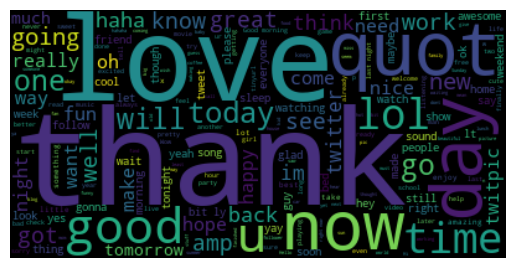

In [23]:
# Word cloud positive
stopwords = set(STOPWORDS)
stopwords.update(["lazy"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [24]:
negative

,sentiment,tweet
1,0,"It's not what you said, it's how you said it!"
3,0,@TwitItCherish I don't know if she likes the l...
6,0,@hamiltonhadwin It was for the better. You w...
7,0,@br00klynbetty youR noT rude!!! I was PlaYiN!!...
8,0,@BoSSCHiCKStEF I'm mad I hvnt seen u since I b...
...,...,...
9992,0,@crackedknuckles i tried fighting for you but ...
9994,0,4 cigarettes left man i should really give up
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...


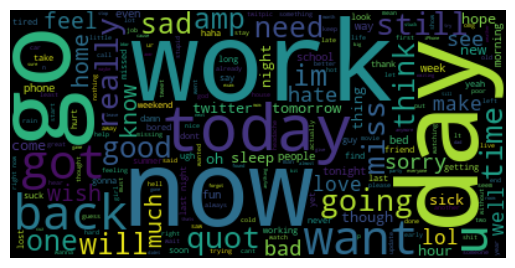

In [25]:
# word cloud negative
neg = "".join(str(review) for review in negative.tweet)
wordcloud3 = WordCloud(stopwords = stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [26]:
# review distribution
df['sentimentt'] = df['sentiment'].replace({0 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show(renderer="colab")

In [27]:
# removing punctuation method 1
def remove_punctuation(tweet):
    final = "".join(u for u in tweet if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['tweet'] = df['tweet'].apply(remove_punctuation)
df = df.dropna(subset=['tweet'])
df['tweet'] = df['tweet'].apply(remove_punctuation)

In [28]:
# Extracting input and output
X =  df['tweet']
# X=df['Text']
y = df['sentiment']

############ WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE) #############




